## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Load Data From Temp Sensors

In [4]:
plotdir = hpc_ext_path+'plots/temp_cross_check/2019-07-16/'

In [23]:
directory = '/home/ckampa/Dropbox/LogFiles/'#hpc_ext_path+'datafiles/magnet_stability/nmr/'
filename = '2019-07-15 081357slow.txt'#'2019-07-10 161439slow.txt'#'2019-06-26 145723slow.txt'

In [24]:
df = pd.read_csv(directory+filename)

In [54]:
df.columns = df.columns.str.strip().str.replace(" ","_")
df.columns = df.columns.str.strip().str.replace("Chamber_Wall_","")

In [26]:
len(df)

1554

In [27]:
df = df[df["NMR_[T]"] != 0]

In [28]:
len(df)

1554

In [29]:
dates = [parser.parse(row.Time) for row in df.itertuples()]# if isdatetime(row.Time.values[0])]
df["Datetime"] = pd.to_datetime(dates).astype("str")
df = df.set_index("Datetime")

In [33]:
df.tail(15)

,Time,Magnet_Current_[A],Magnet_Voltage_[V],Coil_1_(new),Coil_2_(old),LCW_in_Coil1,LCW_out_Coil_1,LCW_in_Coil_2,LCW_out_Coil_2,Yoke,...,LCW_to_magnet,NMR_[T],NMR_[FFT],Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z,
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-07-16 09:53:36,7/16/2019 9:53:36 AM,256.069391,33.804767,55.450840,52.884720,31.067026,34.074745,32.457222,38.410057,29.399656,...,31.155804,1.249125,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:54:36,7/16/2019 9:54:36 AM,256.069358,33.805050,55.314220,52.728951,31.064089,34.070446,32.630970,38.366184,29.399675,...,31.179604,1.249124,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:55:36,7/16/2019 9:55:36 AM,256.069350,33.805467,55.304298,52.787628,31.071636,34.071884,32.526150,38.446625,29.408203,...,31.138071,1.249123,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:56:36,7/16/2019 9:56:36 AM,256.069356,33.805617,55.225750,52.777535,31.076521,34.128124,32.434517,38.483314,29.410212,...,31.131432,1.249123,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:57:36,7/16/2019 9:57:36 AM,256.069352,33.805667,55.272507,52.790504,31.052425,34.089020,32.330608,38.463943,29.401073,...,31.156492,1.249122,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:58:36,7/16/2019 9:58:36 AM,256.069390,33.805550,55.297154,52.807064,31.064838,34.099098,32.333031,38.445641,29.407572,...,31.144789,1.249122,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 09:59:36,7/16/2019 9:59:36 AM,256.069356,33.805483,55.441433,52.776958,31.068365,34.099018,32.422966,38.501797,29.434649,...,31.124300,1.249122,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 10:00:36,7/16/2019 10:00:36 AM,256.069370,33.805400,55.396225,52.770752,31.062790,34.076717,32.462486,38.470478,29.433624,...,31.119688,1.249121,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-07-16 10:01:36,7/16/2019 10:01:36 AM,256.069350,33.805333,55.419346,52.821934,31.074394,34.125622,32.368195,38.452866,29.430395,...,31.130308,1.249121,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN


In [55]:
#df_temp = df.loc['2019-07-02 11:00:00':'2019-07-02 11:30:00']
df_temp = df.loc['2019-07-16 09:35:00':'2019-07-16 09:55:00']

In [56]:
df_temp["NMR_[T]"]

Datetime
2019-07-16 09:35:36    1.249128
2019-07-16 09:36:36    1.249128
2019-07-16 09:37:36    1.249128
2019-07-16 09:38:36    1.249129
2019-07-16 09:39:36    1.249129
2019-07-16 09:40:36    1.249129
2019-07-16 09:41:36    1.249129
2019-07-16 09:42:36    1.249129
2019-07-16 09:43:36    1.249129
2019-07-16 09:44:36    1.249129
2019-07-16 09:45:36    1.249129
2019-07-16 09:46:36    1.249128
2019-07-16 09:47:36    1.249127
2019-07-16 09:48:36    1.249127
2019-07-16 09:49:36    1.249127
2019-07-16 09:50:36    1.249126
2019-07-16 09:51:36    1.249126
2019-07-16 09:52:36    1.249125
2019-07-16 09:53:36    1.249125
2019-07-16 09:54:36    1.249124
Name: NMR_[T], dtype: float64

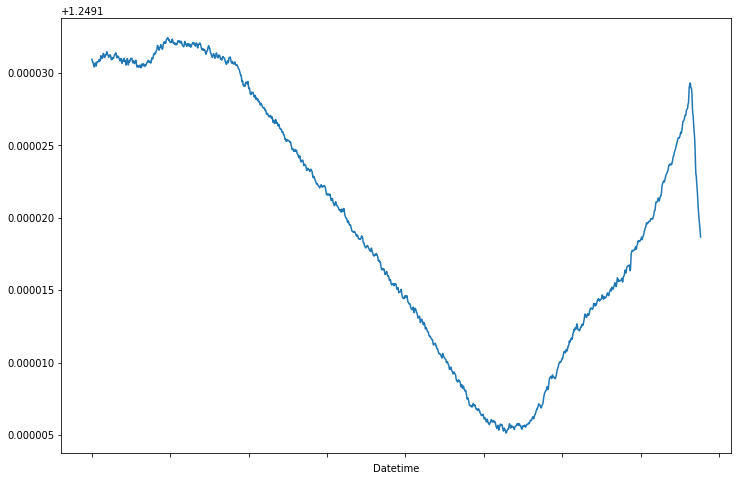

In [40]:
df["NMR_[T]"].plot()

## Input Hand Measured Data

In [57]:
df.columns 

Index(['Time', 'Magnet_Current_[A]', 'Magnet_Voltage_[V]', 'Coil_1_(new)',
       'Coil_2_(old)', 'LCW_in_Coil1', 'LCW_out_Coil_1', 'LCW_in_Coil_2',
       'LCW_out_Coil_2', 'Yoke', 'Hall_Element', 'Floor', 'Roof',
       'Parameter_HVAC_return', 'Parameter_HVAC_sensor', 'CH13', 'CH14',
       'CH15', 'CH16', 'CH17', 'CH18', 'CH19', 'CH20', 'Desk_Ambient',
       'Outlet_Strip_Ambient', 'Top_fo_Orange_PS_Ambient',
       'Spare_Ambient_on_desk', 'TrippLite_Ambient_3ft_high',
       'TrippLite_Ambient_Floor', 'PS_internal', 'PS_Vent1', 'PS_Vent2',
       'TrippLite_HVAC_supply', 'Tripplite_HVAC_exhaust', 'LCW_to_PS',
       'LCW_in_barrel', 'ICW_in', 'ICW_HE1_out', 'ICW_He2_out',
       'LCW_return_magnet', 'LCW_to_barrel', 'LCW_from_PS', 'LCW_to_magnet',
       'NMR_[T]', 'NMR_[FFT]', 'Zaber_Meas_MicroStep_X',
       'Zaber_Meas_Encoder_X', 'Zaber_Meas_MicroStep_Y',
       'Zaber_Meas_Encoder_Y', 'Zaber_Meas_MicroStep_Z',
       'Zaber_Meas_Encoder_Z', ''],
      dtype='object')

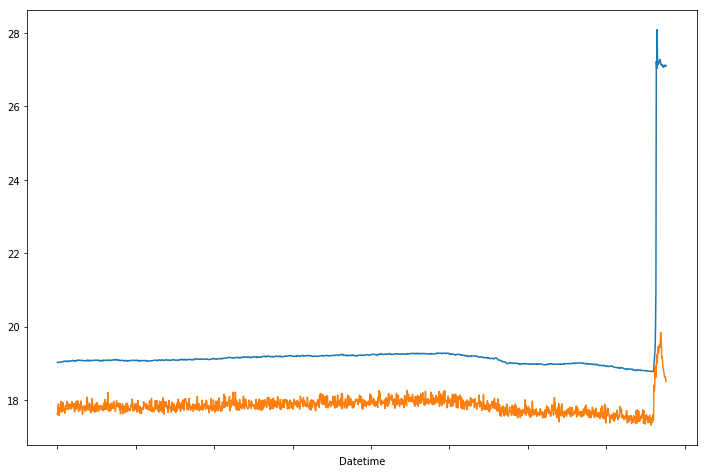

In [39]:
df.Parameter_HVAC_return.plot()
df.Parameter_HVAC_sensor.plot()

In [81]:
meas_dict = {
 'Coil_1_(new)':56.3,#55.4,
 'Coil_2_(old)':54.0,
 'Yoke':29.9, #29.6,
 'Parameter_HVAC_return': 27.7, # NOW YOKE TOP CENTER
 #'Hall_Element':26.0,
 'Roof':19.6,#19.5,
 'Floor':22.6,#22.7
 'Parameter_HVAC_sensor':18.3,#20.0,
 'CH13':20.3,#19.8,
 'CH14':21.6,#21.5,
 'CH15':21.7,#21.6,
 'CH16':21.6,#21.6,
 'CH17':20.0,#19.9,
 'CH18':20.4,#20.4,
 'CH19':19.5,#19.5,
 'CH20':19.2,#19.2,
 'LCW_in_Coil1':30.6,
 'LCW_out_Coil_1':32.5,
 'LCW_out_Coil_2':39.9,
}

In [44]:
scatter2d(df_temp.index,df_temp["NMR_[T]"],inline=True);

Figure({
    'data': [{'marker': {'size': 2},
              'mode': 'lines',
              'name': 'NMR_[T]',
              'type': 'scatter',
              'uid': '93b5b30e-5f9d-4f6b-8dbc-30e9ea8d354a',
              'x': array(['2019-07-16 09:35:36', '2019-07-16 09:36:36', '2019-07-16 09:37:36',
                          '2019-07-16 09:38:36', '2019-07-16 09:39:36', '2019-07-16 09:40:36',
                          '2019-07-16 09:41:36', '2019-07-16 09:42:36', '2019-07-16 09:43:36',
                          '2019-07-16 09:44:36', '2019-07-16 09:45:36', '2019-07-16 09:46:36',
                          '2019-07-16 09:47:36', '2019-07-16 09:48:36', '2019-07-16 09:49:36',
                          '2019-07-16 09:50:36', '2019-07-16 09:51:36', '2019-07-16 09:52:36',
                          '2019-07-16 09:53:36', '2019-07-16 09:54:36'], dtype=object),
              'y': array([1.24912788, 1.24912792, 1.24912847, 1.24912905, 1.24912915, 1.24912931,
                          1.24912928, 1.

In [63]:
dt = parser.parse("2019-07-16 09:45:00")

In [67]:
dt

datetime.datetime(2019, 7, 16, 9, 45)

In [82]:
df_meas = pd.DataFrame(meas_dict,index=[dt])

In [83]:
df_meas

,Coil_1_(new),Coil_2_(old),Yoke,Parameter_HVAC_return,Roof,Floor,Parameter_HVAC_sensor,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,LCW_in_Coil1,LCW_out_Coil_1,LCW_out_Coil_2
2019-07-16 09:45:00,56.3,54.0,29.9,27.7,19.6,22.6,18.3,20.3,21.6,21.7,21.6,20.0,20.4,19.5,19.2,30.6,32.5,39.9


In [84]:
dt2 = ["2019-07-16 09:45:00"]
df_meas["Datetime"] = pd.to_datetime(dt2).astype("str")
df_meas = df_meas.set_index("Datetime")

In [85]:
df_meas

,Coil_1_(new),Coil_2_(old),Yoke,Parameter_HVAC_return,Roof,Floor,Parameter_HVAC_sensor,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,LCW_in_Coil1,LCW_out_Coil_1,LCW_out_Coil_2
Datetime,,,,,,,,,,,,,,,,,,
2019-07-16 09:45:00,56.3,54.0,29.9,27.7,19.6,22.6,18.3,20.3,21.6,21.7,21.6,20.0,20.4,19.5,19.2,30.6,32.5,39.9


## Plots

In [86]:
col = "CH13"
fig = scatter2d([df_temp.index,df_meas.index],[df_temp[col],df_meas[col]],markers=True,lines=False,size_list=[6,6],show_plot=False,inline=True)
'''
fig = scatter2d([df_temp.index],[df_temp[col]],markers= True,lines=False,size_list=[6],show_plot=False,inline=True)
fig.add_scatter(
    x=[df_meas.index],
    y=[df_meas[col]],
    #mode='markers',
    error_x = dict(
        type='data',
        value=6,
        #visible = True
    )
)
'''
iplot(fig)

In [87]:
for col in df_meas.columns:
    fig = scatter2d([df_temp.index,df_meas.index],[df_temp[col],df_meas[col]],markers=True,lines=False,size_list=[6,6],show_plot=False,inline=True)
    pio.write_image(fig,plotdir+f"time_series/{col}_vs_time.pdf")
    pio.write_image(fig,plotdir+f"time_series/{col}_vs_time.png")

In [88]:
meas = list(meas_dict.values())
meas = pd.Series(meas,name="Measured Temp")
histo(meas,bins=5,inline=True);

In [89]:
df_meas.columns

Index(['Coil_1_(new)', 'Coil_2_(old)', 'Yoke', 'Parameter_HVAC_return', 'Roof',
       'Floor', 'Parameter_HVAC_sensor', 'CH13', 'CH14', 'CH15', 'CH16',
       'CH17', 'CH18', 'CH19', 'CH20', 'LCW_in_Coil1', 'LCW_out_Coil_1',
       'LCW_out_Coil_2'],
      dtype='object')

In [90]:
error = dict()
for col in list(df_meas.columns):
    error[col] = df_meas[col].values[0] - df_temp[col].mean()

In [91]:
error

{'Coil_1_(new)': 1.1960311899999923,
 'Coil_2_(old)': 1.2171119699999977,
 'Yoke': 0.5549732150000004,
 'Parameter_HVAC_return': 3.1564124100000015,
 'Roof': 0.5639123850000018,
 'Floor': 0.3256297100000012,
 'Parameter_HVAC_sensor': -0.7266079949999984,
 'CH13': -0.6322841699999984,
 'CH14': -0.27808819000000184,
 'CH15': -0.24908237999999727,
 'CH16': 0.391673664999999,
 'CH17': 0.1655858049999992,
 'CH18': 0.24792833499999745,
 'CH19': 0.057787804999996695,
 'CH20': 0.1781255699999953,
 'LCW_in_Coil1': -0.4367960950000054,
 'LCW_out_Coil_1': -1.542236514999999,
 'LCW_out_Coil_2': 1.5244886349999902}

In [92]:
error_series = pd.Series(list(error.values()),name="error")

In [93]:
histo(error_series,inline=True);